<a href="https://colab.research.google.com/github/lookingforfeng/789789/blob/main/%E6%AC%A2%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("looking feng")

looking feng


Route 1: Path = [(52, 271), (80, 271), (95, 271), (98, 277), (63, 275), (27, 273), (1, 272)], Total Distance = 199.84
Route 2: Path = [(72, 189), (92, 197), (96, 195), (86, 187), (71, 187), (42, 188), (25, 186), (4, 184)], Total Distance = 197.05
Route 3: Path = [(21, 103), (43, 101), (54, 101), (72, 104), (75, 103), (89, 99), (95, 99), (82, 96), (80, 95), (81, 90), (16, 97)], Total Distance = 198.11
Route 4: Path = [(83, 215), (84, 217), (85, 208), (80, 213), (75, 217), (73, 212), (72, 215), (71, 217), (63, 217), (62, 224), (62, 225), (58, 223), (44, 218), (35, 215), (24, 217), (23, 217), (18, 218), (16, 218)], Total Distance = 198.72
Route 5: Path = [(75, 88), (78, 81), (74, 83), (69, 98), (69, 99), (69, 100), (75, 111), (52, 96), (50, 98), (49, 98), (39, 91), (26, 90)], Total Distance = 199.96
Route 6: Path = [(24, 131), (64, 131), (88, 129), (97, 126), (95, 133), (57, 134), (51, 135), (48, 135), (38, 136)], Total Distance = 200.00
Route 7: Path = [(22, 258), (84, 254), (90, 255), (

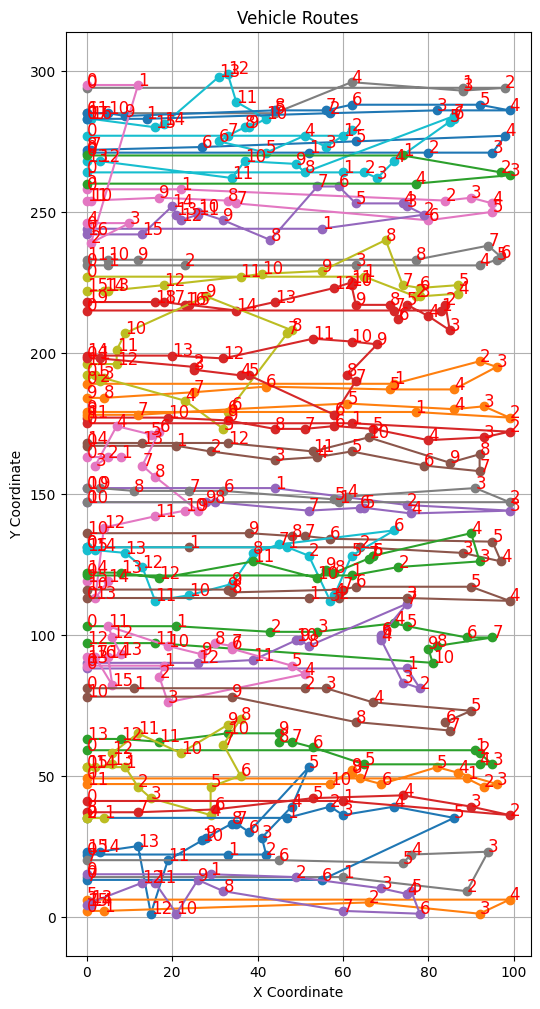

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

class ClarkeWrightVRP:
    def __init__(self, points, depot_line_x=0, max_distance=np.inf):
        self.points = points  # Points as (x, y) tuples
        self.depot_line_x = depot_line_x
        self.max_distance = max_distance
        self.routes = []

    def calculate_savings(self):
        savings = {}
        n = len(self.points)
        for i in range(n):
            for j in range(i + 1, n):
                depot_to_i = euclidean((self.depot_line_x, self.points[i][1]), self.points[i])
                depot_to_j = euclidean((self.depot_line_x, self.points[j][1]), self.points[j])
                i_to_j = euclidean(self.points[i], self.points[j])
                saving = depot_to_i + depot_to_j - i_to_j
                savings[(i, j)] = saving
        return savings

    def solve(self):
        savings = self.calculate_savings()
        sorted_savings = sorted(savings.items(), key=lambda x: x[1], reverse=True)
        routes = {i: [i] for i in range(len(self.points))}
        merged = set()

        for (i, j), saving in sorted_savings:
            if i in merged or j in merged:
                continue
            potential_route = routes[i] + routes[j]
            if self.check_route_validity(potential_route):
                routes[i] = potential_route
                merged.add(j)
                del routes[j]

        for route_indices in routes.values():
            start_depot = (self.depot_line_x, self.points[route_indices[0]][1])
            end_depot = (self.depot_line_x, self.points[route_indices[-1]][1])
            full_route = [start_depot] + [self.points[idx] for idx in route_indices] + [end_depot]
            if self.check_distance(full_route):
                optimized_route = self.optimize_route_with_2opt([self.points[idx] for idx in route_indices], start_depot, end_depot)
                full_optimized_route = [start_depot] + optimized_route + [end_depot]
                self.routes.append(full_optimized_route)

    def check_route_validity(self, route_indices):
        start_depot = (self.depot_line_x, self.points[route_indices[0]][1])
        end_depot = (self.depot_line_x, self.points[route_indices[-1]][1])
        full_route = [start_depot] + [self.points[idx] for idx in route_indices] + [end_depot]
        return self.check_distance(full_route)

    def check_distance(self, route):
        total_distance = sum(euclidean(route[i], route[i+1]) for i in range(len(route) - 1))
        return total_distance <= self.max_distance

    def optimize_route_with_2opt(self, route, start_depot, end_depot):
        # 2-opt optimization algorithm that keeps the start and end points fixed
        best_route = route
        improved = True
        while improved:
            improved = False
            for i in range(1, len(best_route) - 2):  # Exclude the start and end depot
                for j in range(i + 1, len(best_route)):
                    if j - i == 1: continue  # Skip consecutive 'edges'
                    new_route = best_route[:]
                    new_route[i:j] = best_route[j-1:i-1:-1]  # This is the 2-opt Swap
                    new_full_route = [start_depot] + new_route + [end_depot]
                    old_full_route = [start_depot] + best_route + [end_depot]
                    if self.route_distance(new_full_route) < self.route_distance(old_full_route):
                        best_route = new_route
                        improved = True
        return best_route

    def route_distance(self, route):
        return sum(euclidean(route[i], route[i+1]) for i in range(len(route) - 1))

    def display_routes_info(self):
        for idx, route in enumerate(self.routes):
            non_depot_points = [p for p in route if p in self.points]
            distance = sum(euclidean(route[i], route[i+1]) for i in range(len(route) - 1))
            print(f"Route {idx+1}: Path = {non_depot_points}, Total Distance = {distance:.2f}")

    def plot_routes(self):
        plt.figure(figsize=(6, 12))
        for route in self.routes:
            x, y = zip(*route)
            plt.plot(x, y, marker='o')
            for i in range(len(route)):
                plt.text(route[i][0], route[i][1], str(i), color="red", fontsize=12)
        plt.grid(True)
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('Vehicle Routes')
        plt.show()

# Example usage
np.random.seed(42)
random_points = [(np.random.randint(1, 100), np.random.randint(1, 300)) for _ in range(400)]
vrp = ClarkeWrightVRP(random_points, max_distance=200)
vrp.solve()
vrp.display_routes_info()
vrp.plot_routes()
